<a href="https://colab.research.google.com/github/safeai-snu/Econometrics/blob/main/Part.2/4.ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2장

## 예제 4-1. 정상성 vs. 비정상성 시계열 데이터 시각화

#### 필요한 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 데이터 불러오기

In [2]:
start_date = "2024-01-01"
end_date = "2024-12-31"

stock = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.2/data/AAPL_stock.csv", index_col=0)
stock.index = pd.to_datetime(stock.index)
stock = stock.loc[start_date:end_date]

us_employment = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.2/data/us_employment.csv")
us_employment['Month'] = pd.to_datetime(us_employment['Month'], errors='coerce')
us_emp = us_employment[(us_employment['Title'] == "Retail Trade") & (us_employment['Month'].dt.year >= 1980)]
us_emp.index = us_emp['Month']

wn = np.random.randn(500)

global_economy = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.2/data/global_economy.csv')
global_economy['Year'] = pd.to_datetime(global_economy['Year'], format='%Y')
thailand_exports = global_economy[global_economy['Country'] == 'Thailand']
thailand_exports.index = thailand_exports['Year']
vietnam_exports = global_economy[global_economy['Country'] == 'Vietnam']
vietnam_exports.index = vietnam_exports['Year']

C:\Users\admin\AppData\Local\Temp\ipykernel_40652\2157475464.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  us_employment['Month'] = pd.to_datetime(us_employment['Month'], errors='coerce')


#### 정상성 비교 시각화

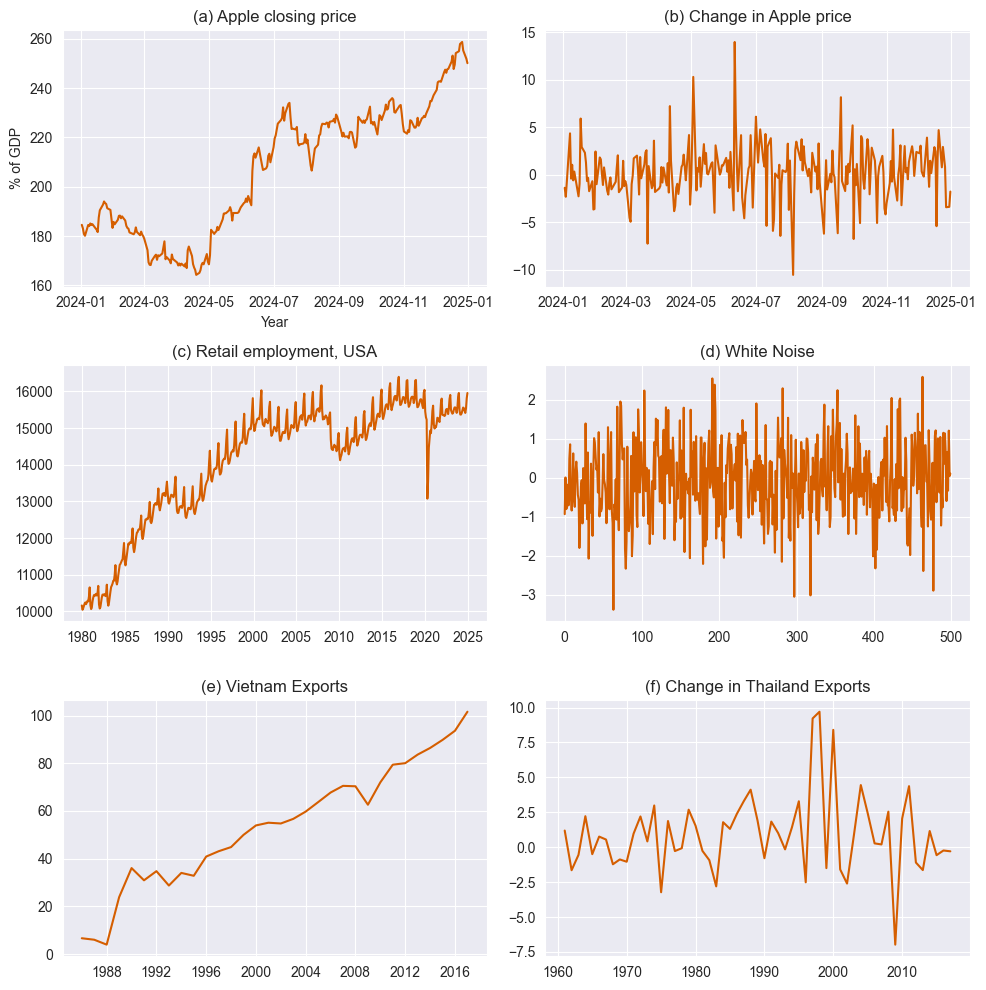

In [3]:
#6개 시계열 시각화
fig, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)

axes[0, 0].plot(stock['close'], color='#D55E00')
axes[0, 0].set_title('(a) Apple closing price')
axes[0, 0].set_ylabel("$US")
axes[0, 0].set_xlabel('Day')

axes[0, 1].plot(stock['close'].diff(), color='#D55E00')
axes[0, 1].set_title('(b) Change in Apple price')
axes[0, 0].set_ylabel("$US")
axes[0, 0].set_xlabel('Day')

axes[1, 0].plot(us_emp['Employed'], color='#D55E00')
axes[1, 0].set_title('(c) Retail employment, USA')
axes[0, 0].set_ylabel("Million people")
axes[0, 0].set_xlabel('Year')

axes[1, 1].plot(wn, color='#D55E00')
axes[1, 1].set_title('(d) White Noise')

axes[2, 0].plot(vietnam_exports['Exports'], color='#D55E00')
axes[2, 0].set_title('(e) Vietnam Exports')
axes[0, 0].set_ylabel("% of GDP")
axes[0, 0].set_xlabel('Year')

axes[2, 1].plot(thailand_exports['Exports'].diff()[1:], color='#D55E00')
axes[2, 1].set_title('(f) Change in Thailand Exports')
axes[0, 0].set_ylabel("% of GDP")
axes[0, 0].set_xlabel('Year')

for i in range(3):
    for j in range(2):
        axes[i, j].grid(True)

plt.tight_layout()
plt.show()

## 예제 4-2. 차분 예시

### 코르티코스테로이드 판매량 그래프 차분 시각화

#### 필요한 패키지 불러오기

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 불러오기 및 전처리

In [5]:
h02 = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.2/data/h02.csv", index_col=0)
h02.index = pd.date_range(start='1/1/1992', periods=h02.shape[0], freq='1MS')

h02

,x
1992-01-01,0.429795
1992-02-01,0.400906
1992-03-01,0.432159
1992-04-01,0.492543
1992-05-01,0.502369
...,...
2008-08-01,0.761822
2008-09-01,0.649435
2008-10-01,0.827887
2008-11-01,0.816255


#### 필요한 함수 정의

In [6]:
def log_series(series):
    tmp = np.log(series)
    return pd.Series(tmp, series.index)

def plot_series(series, x_label, y_label, title):
    plt.figure(figsize=(10, 6))
    plt.plot(series,  color='black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()

#### 데이터 시각화

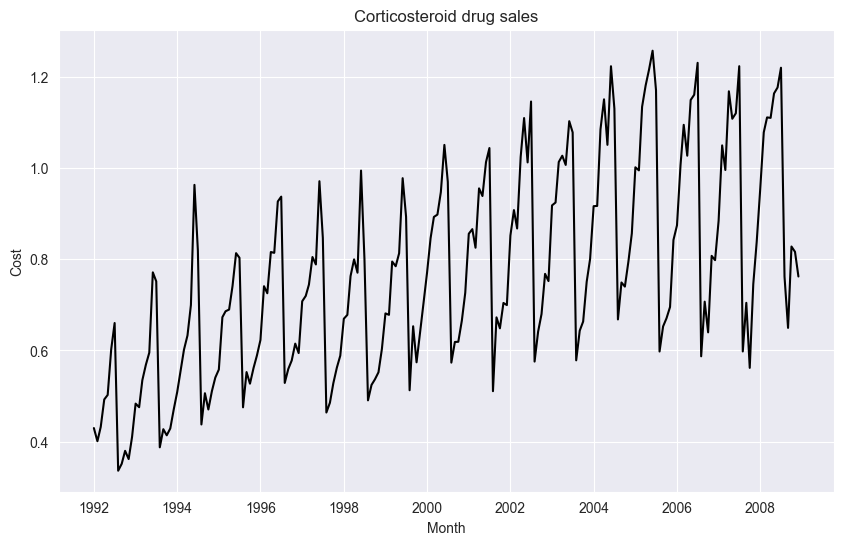

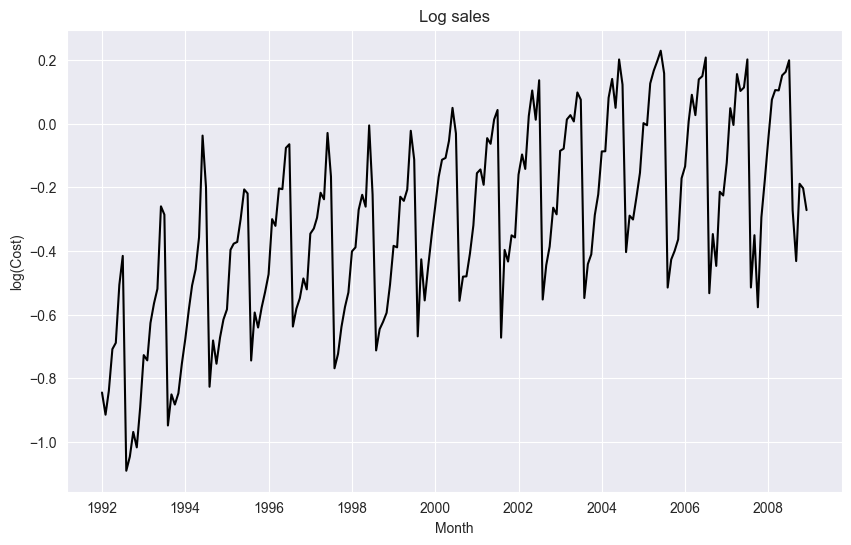

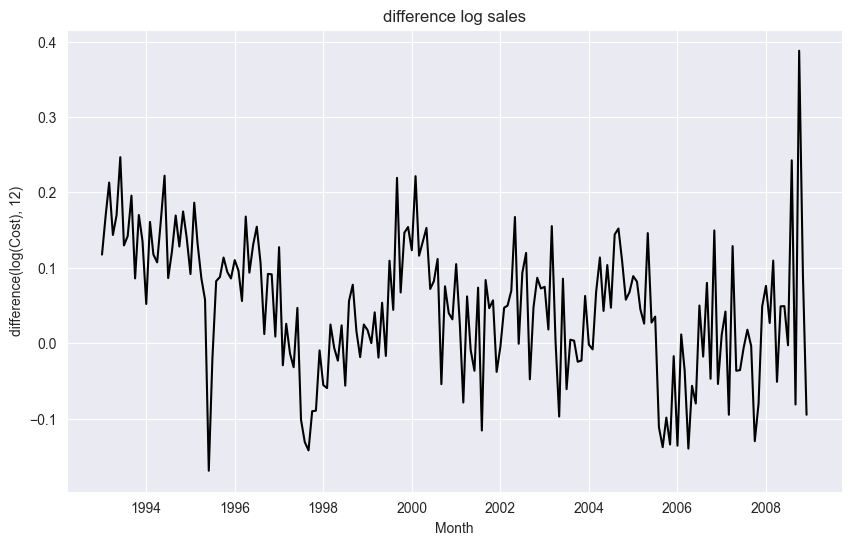

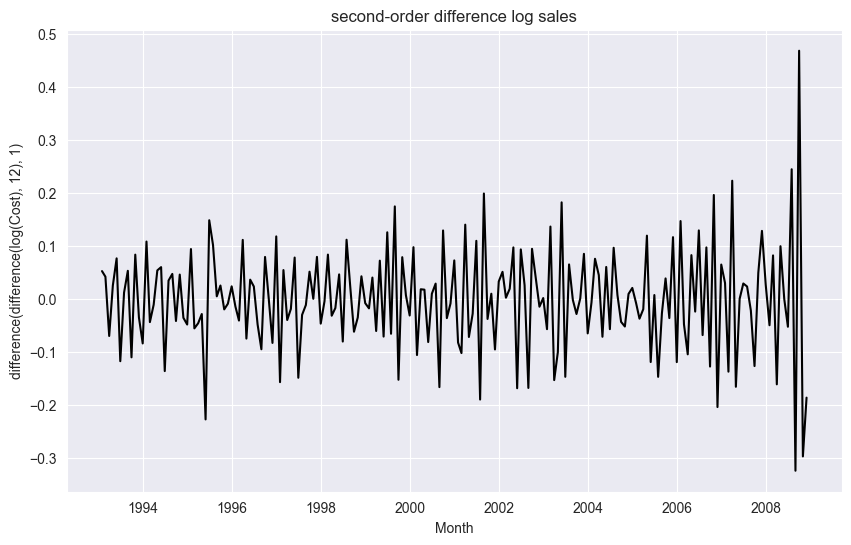

In [7]:
plot_series(h02.x, "Month", "Cost", "Corticosteroid drug sales")

log_h02 = log_series(h02.x)
plot_series(log_h02, "Month", "log(Cost)", "Log sales")

diff12_h02 = log_h02.diff(12)[12:]
plot_series(diff12_h02, "Month", "difference(log(Cost), 12)", "difference log sales")

diff1_diff12_h02 = diff12_h02.diff()[1:]
plot_series(diff1_diff12_h02, "Month", "difference(difference(log(Cost), 12), 1)", "second-order difference log sales")

### 차분 자동 선택

In [8]:
from statsmodels.tsa.seasonal import STL

def seasonal_strength(series):
    stl_result = STL(series).fit()
    r = stl_result.resid
    s = stl_result.seasonal
    var1 = r.var()
    var2 = (s+r).var()
    return max(0, 1-var1/var2)

print(seasonal_strength(log_h02))
print(seasonal_strength(diff12_h02))

0.9708953840295775
0.25648096270088405


## 예제 4-3. AR(1) 예시

#### 필요한 패키지 불러오기

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### 필요한 함수 정의

In [10]:
def plot_series(series, x_label, y_label, title):
    plt.figure(figsize=(10, 6))
    plt.plot(series,  color='black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()

def AR1(c=0, phi=0, noise=1, n=100):
    noise = np.random.normal(0, noise, n)
    data = [c/(1 - phi) + noise[0]]
    for i in range(1, n):
        data.append(c + phi * data[i-1] + noise[i])
    return data

#### 데이터 생성 및 시각화

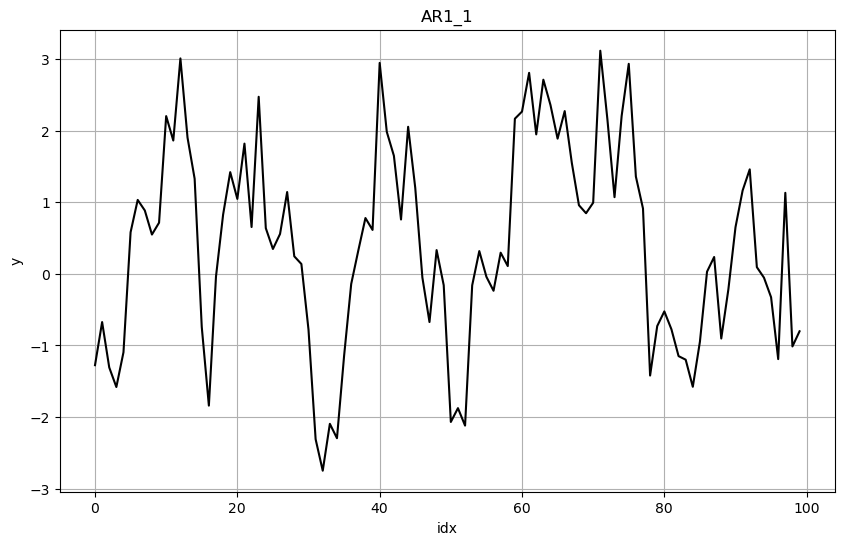

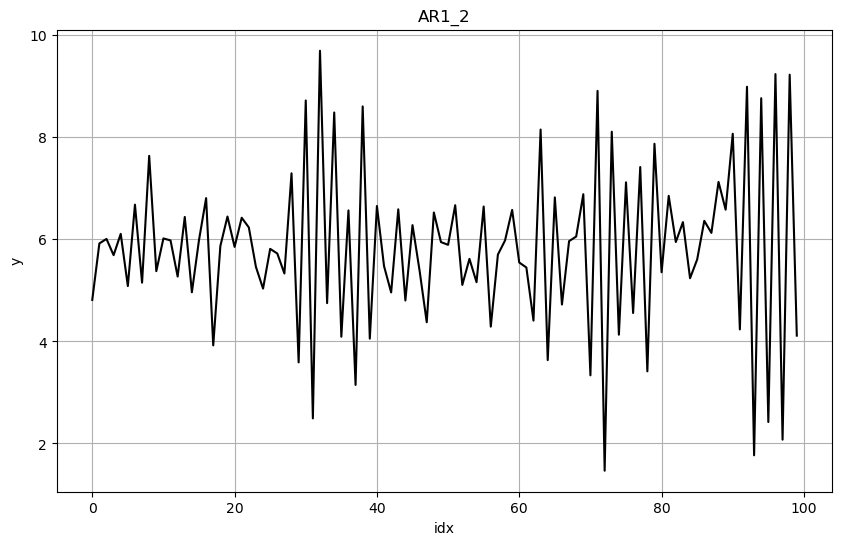

In [11]:
ex_AR1_1 = pd.Series(AR1(phi=0.75))
plot_series(ex_AR1_1, "idx", "y", "AR1_1")

ex_AR1_2 = pd.Series(AR1(c=10, phi=-0.75))
plot_series(ex_AR1_2, "idx", "y", "AR1_2")

#### ACF 시각화

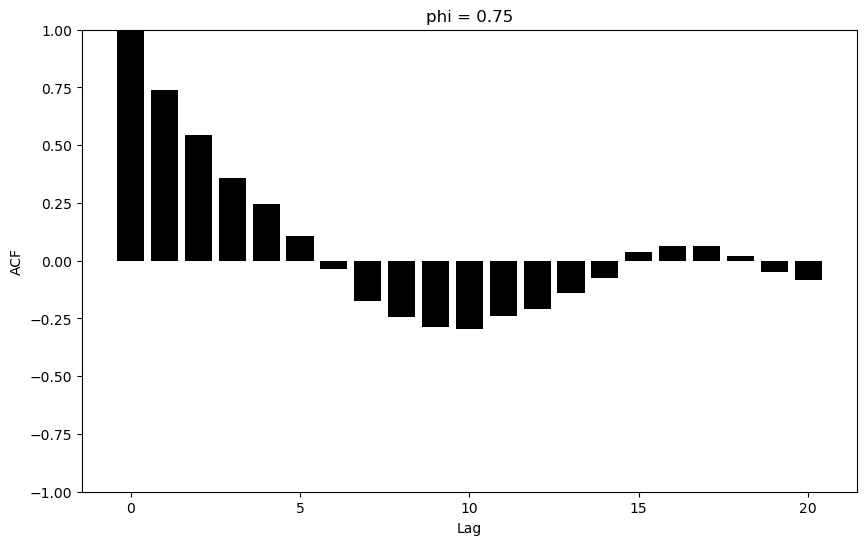

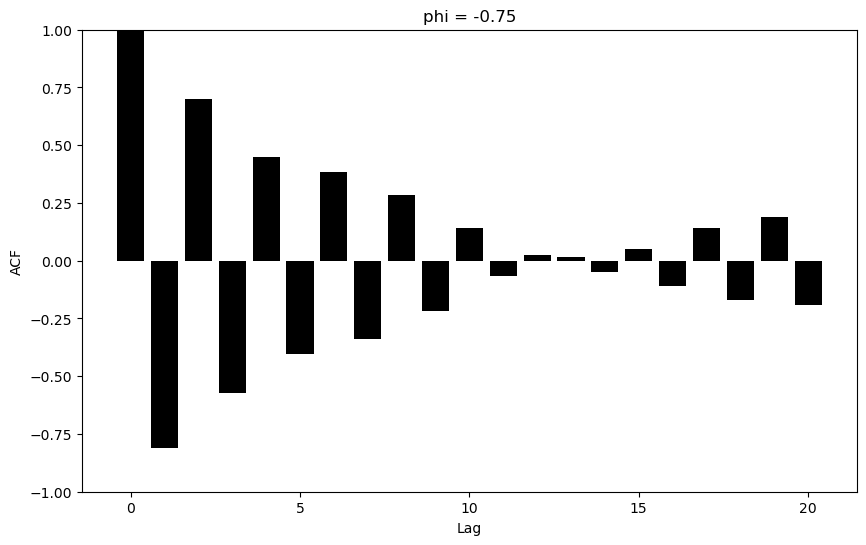

In [12]:
def show_ACF(series, title, start=0, nlags=None):
    plt.figure(figsize=(10, 6))
    ACF = acf(series, fft=False, nlags=nlags)
    plt.bar(range(start, ACF.shape[0]), ACF[start:], color='black')
    plt.xlabel("Lag")
    plt.ylabel("ACF")
    plt.ylim(-1, 1)
    plt.title(title)
    plt.show()

show_ACF(ex_AR1_1, "phi = 0.75")
show_ACF(ex_AR1_2, "phi = -0.75")

#### 모듈을 통한 시각화

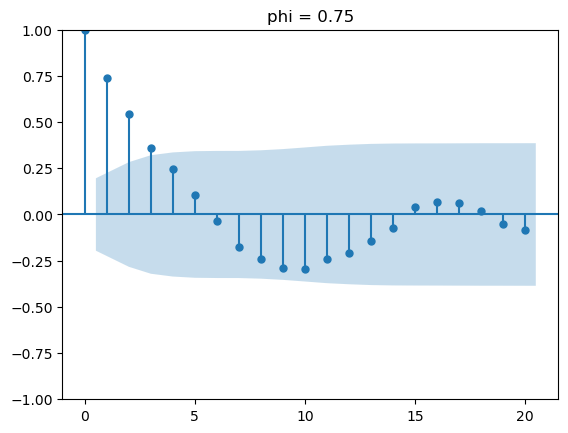

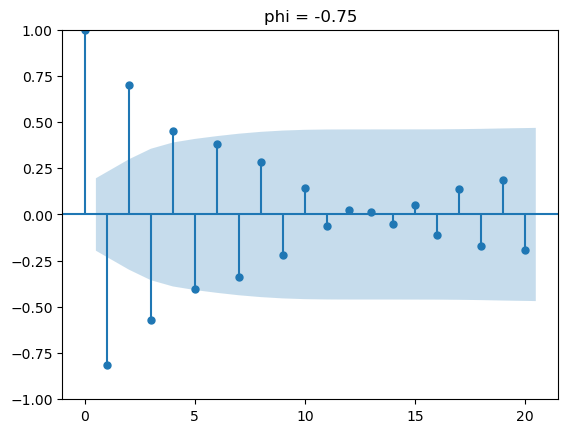

In [13]:
plot_acf(ex_AR1_1)
plt.title('phi = 0.75')
plt.show()

plot_acf(ex_AR1_2)
plt.title('phi = -0.75')
plt.show()

## 예제 4-4. AR(p) 예시

#### 필요한 패키지 불러오기

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### 예시 생성 함수

In [15]:
def AR2(c=0, phi1=0, phi2=0, noise=1, n=100):
    noise = np.random.normal(0, noise, n)
    data = [c/(1 - phi1 - phi2) + noise[0], c/(1 - phi1 - phi2) + noise[1]]
    for i in range(2, n):
        data.append(c + phi1 * data[i-1] + phi2 * data[i-2] + noise[i])
    return data

#### 데이터 생성 및 시각화

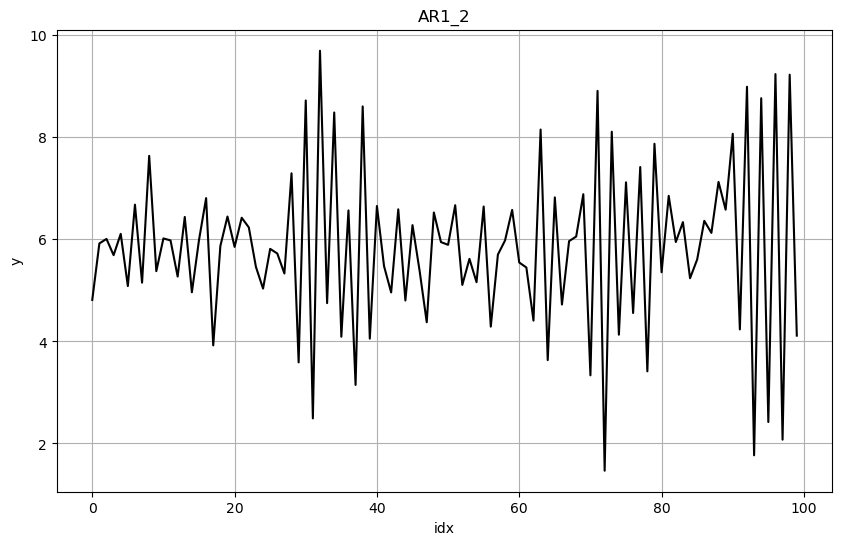

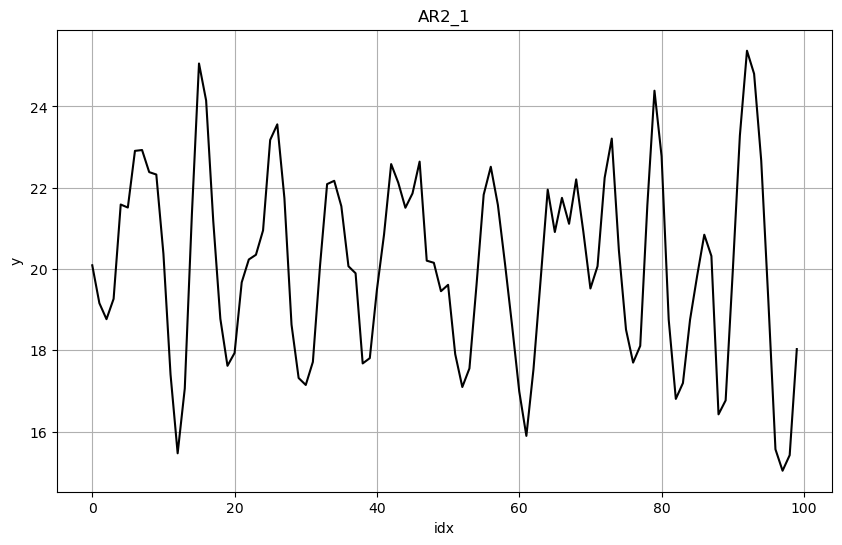

In [16]:
plot_series(ex_AR1_2, "idx", "y", "AR1_2")

ex_AR2_1 = pd.Series(AR2(c=10, phi1=1.25, phi2=-0.75))
plot_series(ex_AR2_1, "idx", "y", "AR2_1")

#### 예시 생성

In [17]:
ex_AR2_2 = pd.Series(AR2(phi1=1.25, phi2=-0.5))
ex_AR2_3 = pd.Series(AR2(phi1=0.5, phi2=-0.5))
ex_AR2_4 = pd.Series(AR2(phi1=0.25, phi2=0.25))
ex_AR2_5 = pd.Series(AR2(phi1=-0.25, phi2=0.25))

#### ACF 시각화

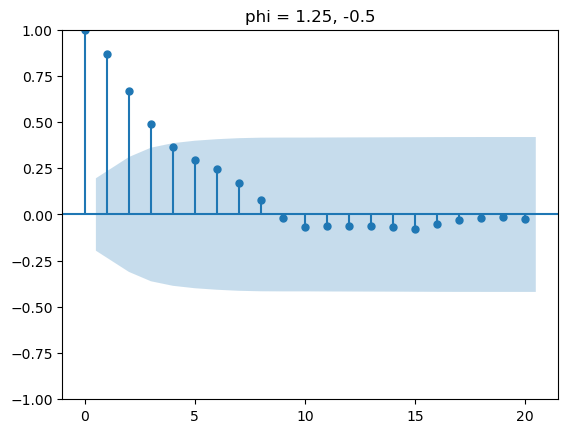

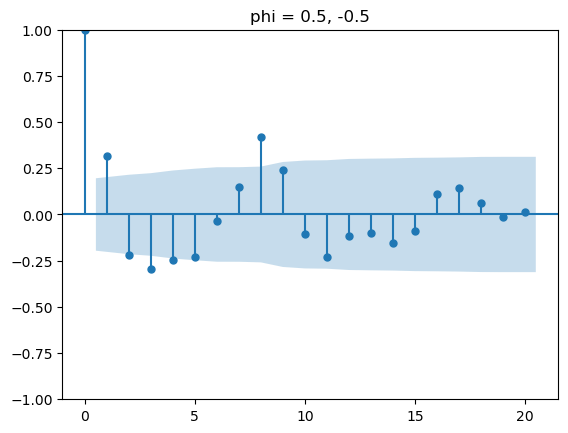

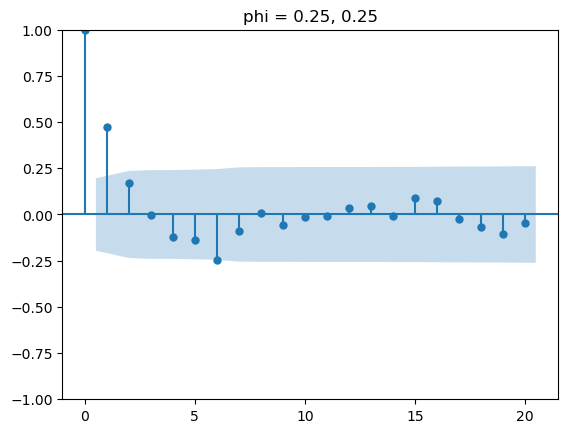

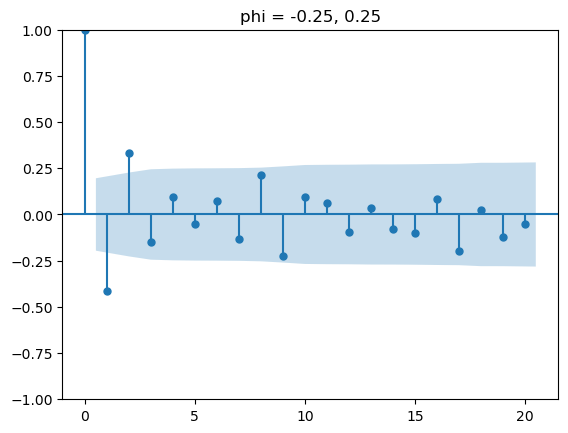

In [18]:
plot_acf(ex_AR2_2)
plt.title('phi = 1.25, -0.5')
plt.show()

plot_acf(ex_AR2_3)
plt.title('phi = 0.5, -0.5')
plt.show()

plot_acf(ex_AR2_4)
plt.title('phi = 0.25, 0.25')
plt.show()

plot_acf(ex_AR2_5)
plt.title('phi = -0.25, 0.25')
plt.show()

## 예제 4-5. 부분 자기상관 함수(PACF) 예시

#### 필요한 패키지 불러오기

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### 예시 생성

In [20]:
noise = np.random.normal(0, 1, 100)
data = [noise[0]]
for i in range(1, 100):
    data.append(0.5 * data[i-1] + noise[i])
ex_AR3_1 = pd.Series(data)

data = [noise[0]]
for i in range(1, 100):
    data.append(0.99 * data[i-1] + noise[i])
ex_AR3_2 = pd.Series(data)

#### 시각화

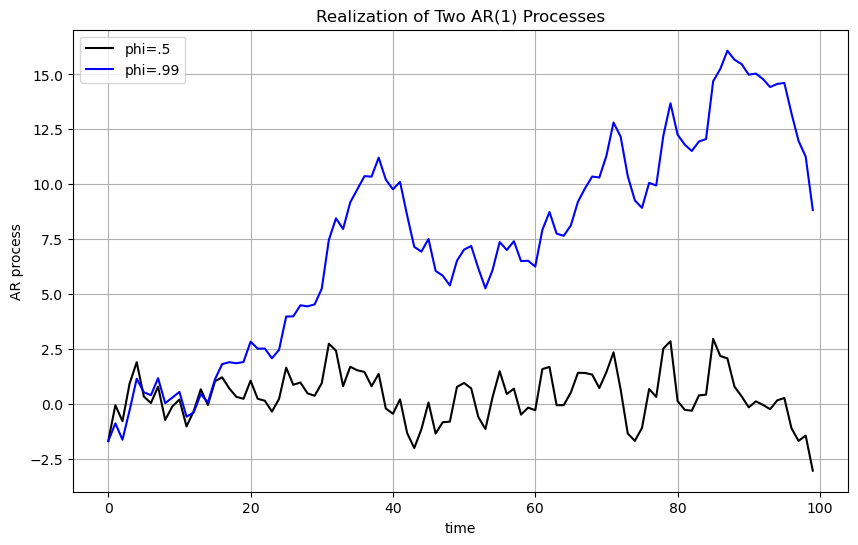

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(ex_AR3_1,  color='black', label='phi=.5')
plt.plot(ex_AR3_2,  color='b', label='phi=.99')
plt.xlabel("time")
plt.ylabel("AR process")
plt.title("Realization of Two AR(1) Processes")
plt.grid(True)
plt.legend()
plt.show()

#### ACF 시각화

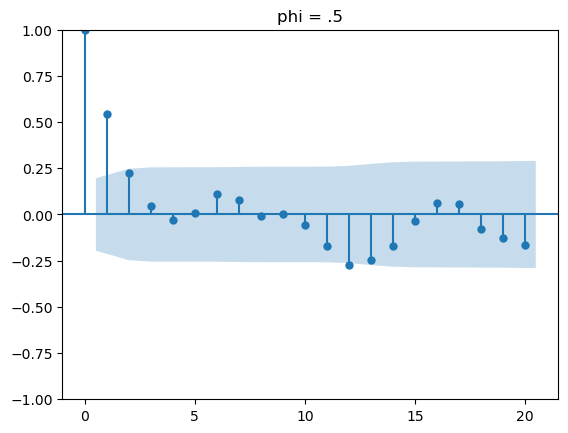

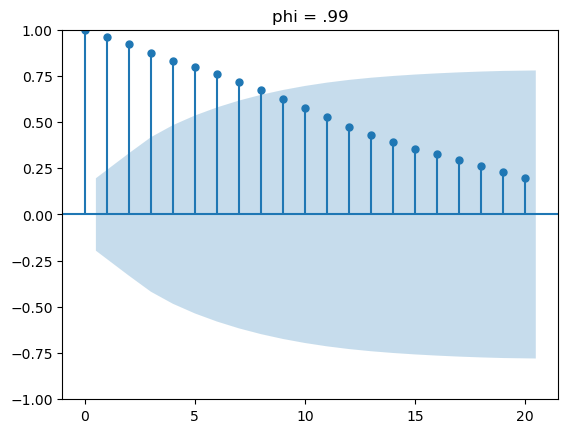

In [22]:
plot_acf(ex_AR3_1)
plt.title('phi = .5')
plt.show()

plot_acf(ex_AR3_2)
plt.title('phi = .99')
plt.show()

#### PACF 시각화

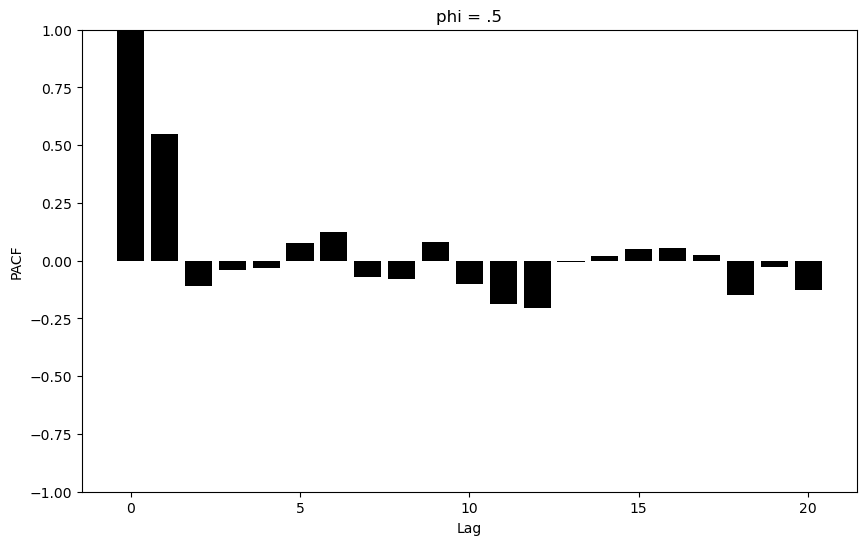

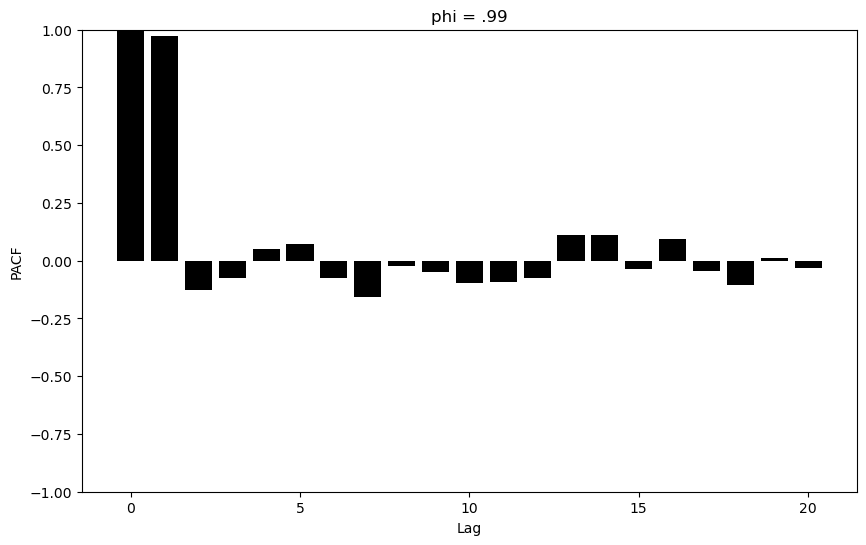

In [23]:
def show_PACF(series, title, start=0, nlags=None):
    plt.figure(figsize=(10, 6))
    PACF = pacf(series, nlags=nlags)
    plt.bar(range(start, PACF.shape[0]), PACF[start:], color='black')
    plt.xlabel("Lag")
    plt.ylabel("PACF")
    plt.ylim(-1, 1)
    plt.title(title)
    plt.show()
    
show_PACF(ex_AR3_1, "phi = .5")
show_PACF(ex_AR3_2, "phi = .99")

#### 모듈을 통한 시각화

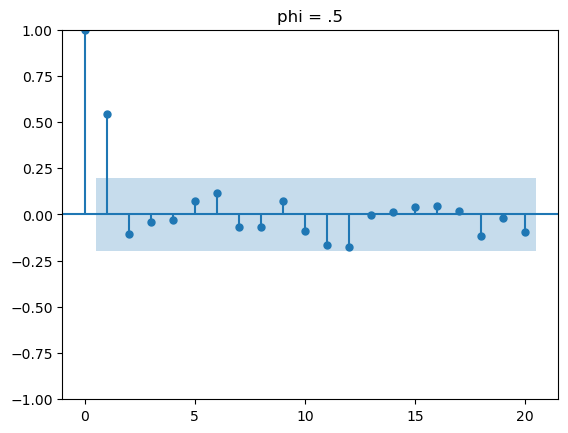

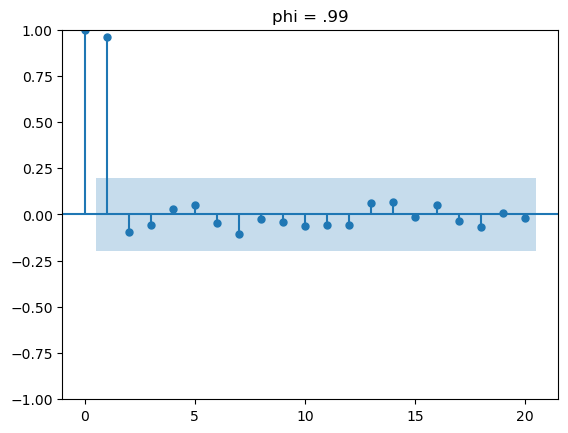

In [24]:
plot_pacf(ex_AR3_1)
plt.title('phi = .5')
plt.show()

plot_pacf(ex_AR3_2)
plt.title('phi = .99')
plt.show()

## 예제 4-6. MA(q) 모델 예시

### 1) MA(1)과 MA(2) 모델 비교

#### 필요한 패키지 불러오기

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### 시각화 함수 정의

In [26]:
def plot_series(series, x_label, y_label, title):
    plt.figure(figsize=(10, 6))
    plt.plot(series,  color='black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()

#### 예시 생성 함수 정의

In [27]:
def MA1(c=0, theta=0, noise=1, n=100):
    noise = np.random.normal(0, noise, n)
    data = [c + noise[0]]
    for i in range(1, n):
        data.append(c + noise[i] + theta * noise[i-1])
    return data

def MA2(c=0, theta1=0, theta2=0, noise=1, n=100):
    noise = np.random.normal(0, noise, n)
    data = [c + noise[0], c + theta1 * noise[0] + noise[1]]
    for i in range(2, n):
        data.append(c + noise[i] + theta1 * noise[i-1] + theta2 * noise[i-2])
    return data

#### 데이터 생성 및 시각화

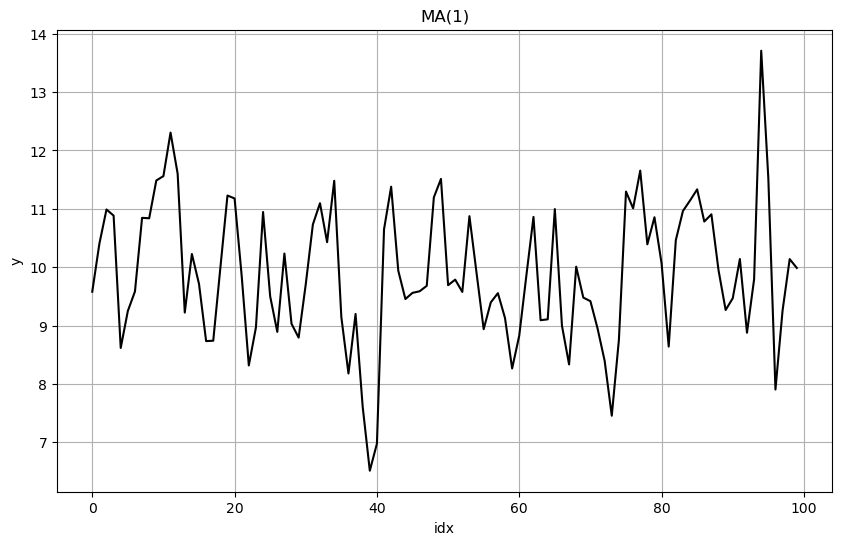

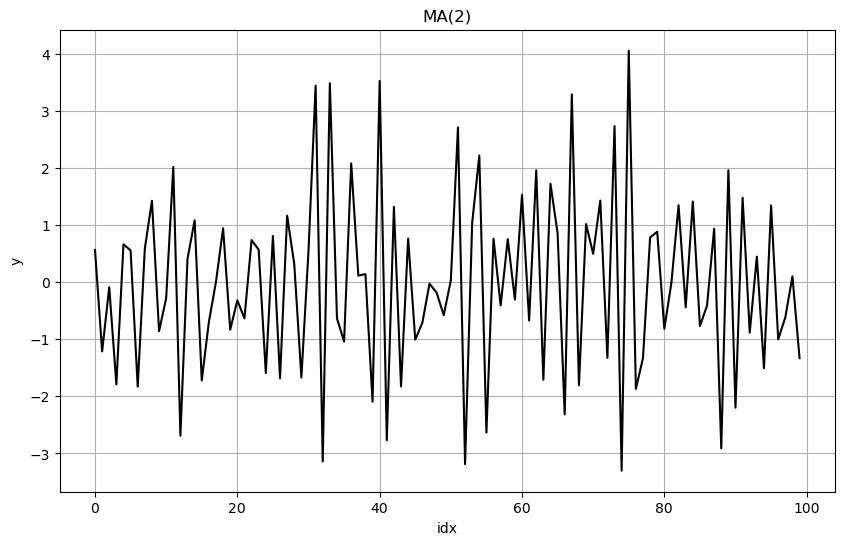

In [28]:
ex_MA1_1 = pd.Series(MA1(c=10, theta=0.75))
plot_series(ex_MA1_1, "idx", "y", "MA(1)")

ex_MA1_2 = pd.Series(MA2(theta1=-1, theta2=0.75))
plot_series(ex_MA1_2, "idx", "y", "MA(2)")

### 2) $\theta$ 에 따른 ACF와 PACF

#### 예시 생성

In [29]:
noise = np.random.normal(0, 1, 100)

data = [noise[0]]
for i in range(1, 100):
    data.append(noise[i] + 0.5* noise[i-1])
ex_MA2_1 = pd.Series(data)

data = [noise[0]]
for i in range(1, 100):
    data.append(noise[i] + 0.99 * noise[i-1])
ex_MA2_2 = pd.Series(data)

#### 시각화

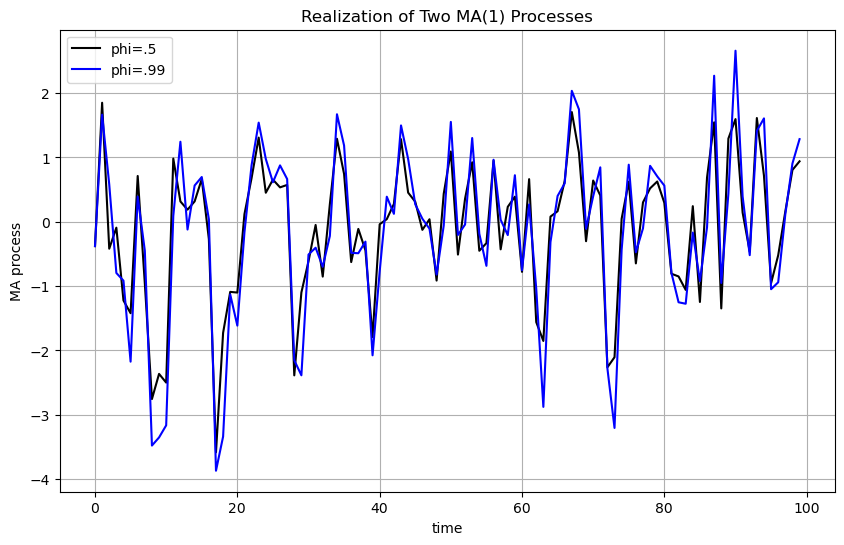

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(ex_MA2_1,  color='black', label='phi=.5')
plt.plot(ex_MA2_2,  color='b', label='phi=.99')
plt.xlabel("time")
plt.ylabel("MA process")
plt.title("Realization of Two MA(1) Processes")
plt.grid(True)
plt.legend()
plt.show()

### ACF 시각화

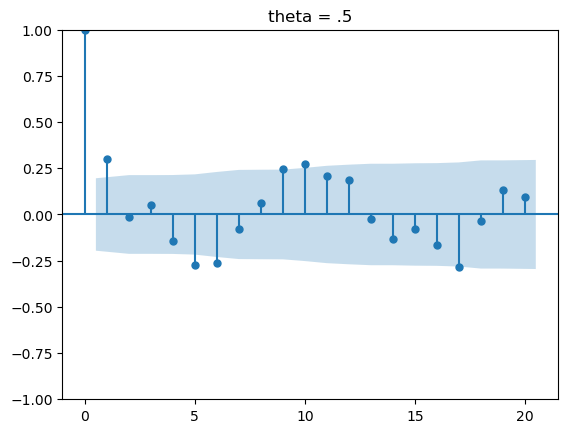

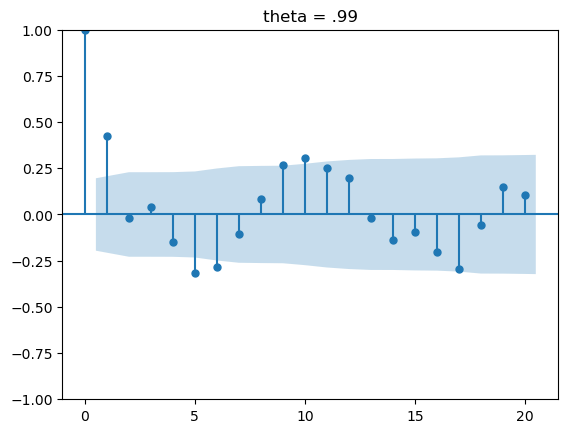

In [31]:
plot_acf(ex_MA2_1)
plt.title('theta = .5')
plt.show()

plot_acf(ex_MA2_2)
plt.title('theta = .99')
plt.show()

### PACF 시각화

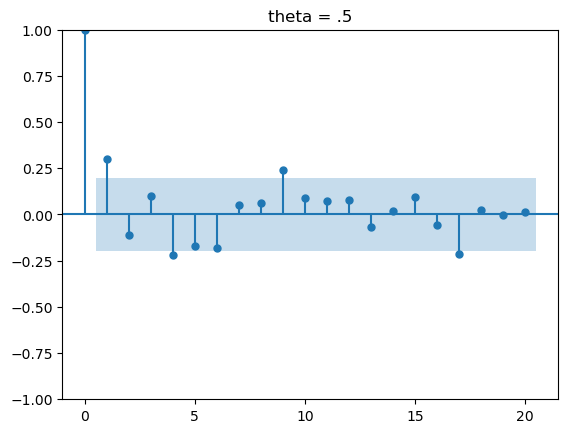

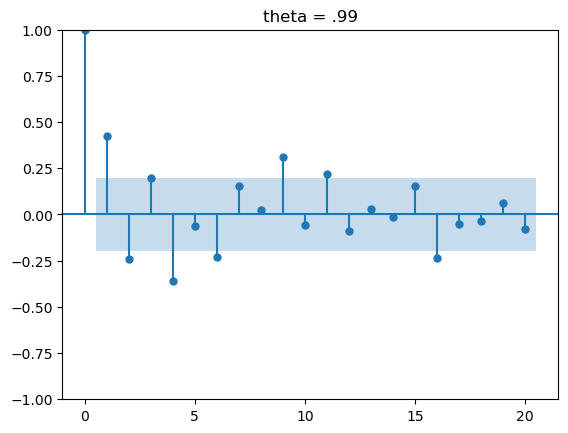

In [32]:
plot_pacf(ex_MA2_1)
plt.title('theta = .5')
plt.show()

plot_pacf(ex_MA2_2)
plt.title('theta = .99')
plt.show()

## 예제 4-7. ADF 검정

#### 필요한 패키지 불러오기

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

#### 예시 생성

In [34]:
noise = np.random.normal(0, 1, 100)
data = [noise[0]]
for i in range(1, 100):
    data.append(0.5 * data[i-1] + noise[i])
ex_1 = pd.Series(data)

noise = np.random.normal(0, 1, 100)
data = [noise[0]]
for i in range(1, 100):
    data.append(0.5 * data[i-1] + noise[i] + 0.05 * i)
ex_2 = pd.Series(data)

#### 시각화

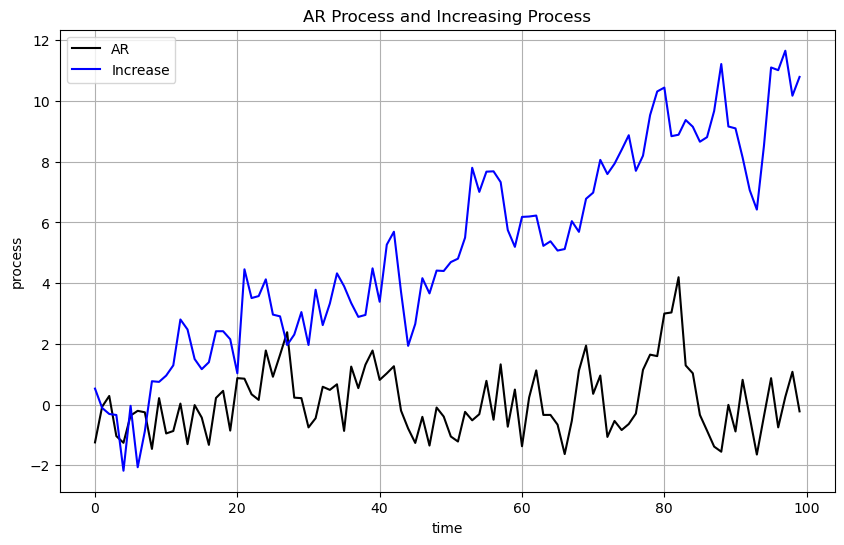

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(ex_1,  color='black', label='AR')
plt.plot(ex_2,  color='b', label='Increase')
plt.xlabel("time")
plt.ylabel("process")
plt.title("AR Process and Increasing Process")
plt.grid(True)
plt.legend()
plt.show()

#### 정상성 확인

In [36]:
#Adfuller test
print(adfuller(ex_1)[1])
print(adfuller(ex_2)[1])

0.0005203070797693758
0.6262062187798707


## 예제 4-8. KPSS 검정

#### 필요한 패키지 불러오기

In [37]:
from statsmodels.tsa.stattools import kpss

#### 정상성 확인

In [38]:
#kpss test
print(kpss(ex_1))
print(kpss(ex_2))

(0.11442076872392574, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(1.6681874189952213, 0.01, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
